In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd

### Exersice 2: knight movement and statistical distribution.

# Knight’s Tour Exercises on a Chessboard

The chessboard consists of 8 rows and 8 columns, forming 64 equally sized squares called **squares**.  
The knight moves two squares in a horizontal or vertical direction, followed by one additional square at a right angle.  
This implies that, from a central square, the knight can access **8 different squares**.  

---

## 1. Random Initial Position

Write a function that **randomly determines the initial position of the knight** on an $N \times N$ chessboard.  

For the case of an $8 \times 8$ board, represent this position using a matrix $A$ whose elements are all zeros except for the element corresponding to the knight’s initial position, which should be indicated by a 1.

---

In [2]:
def starting_position(N):
    """Generates a NxN array of zeros and a single 1 in a random position.
    
    Args:
        N (int): dimension of the array

    Returns:
        np.array: numpy array of zeros with a random 1.
    """
    assert(type(N) == int)
    row, column = rd.randrange(0, N), rd.randrange(0, N)
    A = np.zeros([N, N])
    A[row, column] = 1
    return A

starting_position(8)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

## 2. Random Knight Move

Write a program that, given an initial knight position on an $N \times N$ board, **determines all possible moves** and **randomly selects one**.  

Represent this move on an $8 \times 8$ board by adding a 1 to the matrix $A$ at the new position.

---


In [3]:
def random_move(A, starting_row = .1, starting_column  = .1, index = False):
    """Takes a matrix that represents a chess board of different dimensions with zeros and a 1 in the starting position of
    a knight and returns an array of the same dimension with another 1 in one of the posible squares that the knight can
    move to.

    Args:
        matrix (np.array): array with the movement of a chess knight.
        starting_row (float, optional): if given, it's used for following moves as starting row position. Must be
                                        integer. Defaults to 0.1.
        starting_column (float, optional): if given, it's used for following moves as starting column position. Must
                                           be integer. Defaults to 0.1.
        index (bool, optional): determines whether the user wants the matrix or the coordinates of the random move
                                Defaults to False.

    Returns:
        np.array: array with the starting position and a random move added to the corresponding position.
        or
        tuple: position of the final move.
    """
    matrix = A.copy()
    N = np.shape(matrix)[0]
    if type(starting_row) != int and type(starting_column) != int:
        starting_row, starting_column = np.unravel_index(np.argmax(matrix), matrix.shape)
    else:
        assert(0 <= starting_row < N)
        assert(0 <= starting_column < N)
                
    two_random_squares = [-2, 2]
    one_random_square = [-1, 1]
    
    possible_moves = []
    row, column = starting_row, starting_column
    
    # First move through rows.
    for move1 in two_random_squares:
        row += move1
        if 0 <= row < N:
            for move2 in one_random_square:
                column += move2
                if 0 <= column < N:
                    possible_moves.append((int(row), int(column)))
                column = starting_column
        row  = starting_row
        
    # First move through columns:
    for move1 in two_random_squares:
        column += move1
        if 0 <= column < N:
            for move2 in one_random_square:
                row += move2
                if 0 <= row < N:
                    possible_moves.append((int(row), int(column)))
                row = starting_row
        column = starting_column

    # Choose random move:
    final_move = possible_moves[rd.randrange(0, len(possible_moves))]
    matrix[final_move[0], final_move[1]] += 1
    if not index:
        return matrix
    else:
        return final_move

In [4]:
A = starting_position(8)
print(A)

random_move(A)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

## 3. Counting Visits to Each Square

Write a program that, given a random initial position, **counts the number of times the knight has visited each square** on an $N \times N$ board after performing $M$ moves.  

Represent the number of visits on an $8 \times 8$ board after performing 10,000 moves.  

> **Hint:** Use a matrix whose elements indicate the number of times the knight has visited each square.

---



In [5]:
def moves(M, N = 8):
    """Takes the number of moves a chess knight has to make and returns an array with the number of times the 
    knight starting in the highest value position has gone through each square. Each move is randomly picked among
    all the possible moves.

    Args:
        M (np.array): array with the count of every time the kinght has moved to each position.
        N (int, optional): array (board) size. Defaults to 8.

    Returns:
        np.array: array with numbers from 0 to M representing every time the knight has been to each square.
    """
    matrix = starting_position(N)
    sr, sc = np.unravel_index(np.argmax(matrix), matrix.shape)
    for _ in range(M):
        sr, sc = random_move(matrix, starting_row=sr, starting_column=sc, index = True)
        move = np.zeros([N, N])
        move[sr, sc] = 1
        matrix += move
    return matrix

moves(10000)

array([[ 76.,  78., 147., 134., 132., 122.,  85.,  66.],
       [ 86., 130., 194., 182., 190., 177., 127.,  93.],
       [114., 210., 237., 263., 223., 254., 198., 100.],
       [114., 195., 242., 231., 262., 241., 171., 128.],
       [113., 170., 259., 246., 215., 236., 182., 120.],
       [109., 174., 212., 240., 239., 220., 165., 116.],
       [ 83., 112., 181., 183., 148., 144., 126.,  79.],
       [ 66.,  87., 112.,  98., 116., 116.,  79.,  53.]])

## 4. Relative Frequency of Visits

Write a function that, for a board of size $N$ and $M$ knight moves, **represents the relative frequency of visits** to each square as a list of $N^2$ elements.  

- Represent it for an $8 \times 8$ board and 10,000 moves.  
- Verify that the result **does not depend on the initial position**, and qualitatively estimate the number of moves $M$ required for the distribution to become independent of the starting square.

---



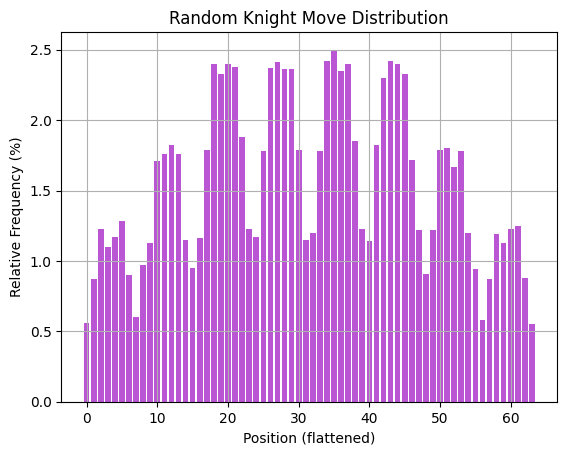

In [6]:
def knight_distribution(M, N = 8, bars = False):
    """Returns the distribution of M moves a chess knight has randomly donde on an NxN size board.

    Args:
        M (int): number of moves
        N (int, optional): array (board) size. Defaults to 8.
        bars (bool, optional): determines whether the user wants the graph of the distribution or not.
                                Defaults to False.

    Returns:
        list: list of relative frequencies for each square of the board.
    """
    matrix = moves(M)
    relative_frequencies, positions = [], []
    for i in range(N):
        for j in range(N):
            relative_frequencies.append(round(100*matrix[i, j]/(M + 1), 2))
            positions.append((i, j))
    relative_frequencies = np.round(100*matrix/(M+1), 2)
    if bars:
        plt.bar(np.arange(N*N), relative_frequencies.flatten(), color = 'mediumorchid')
        plt.xlabel("Position (flattened)")
        plt.ylabel("Relative Frequency (%)")
        plt.title("Random Knight Move Distribution")
        plt.grid()
        plt.show()
    return relative_frequencies

f = knight_distribution(100000, bars=True)

## 5. 2D Visualization of Relative Frequencies

To better understand the result, represent the **relative frequency of visits** to each square on an $8 \times 8$ board after 10,000 moves in a **2D visualization corresponding to the chessboard**.  

- What is happening?  
- How can the result observed in the previous section be explained?

---

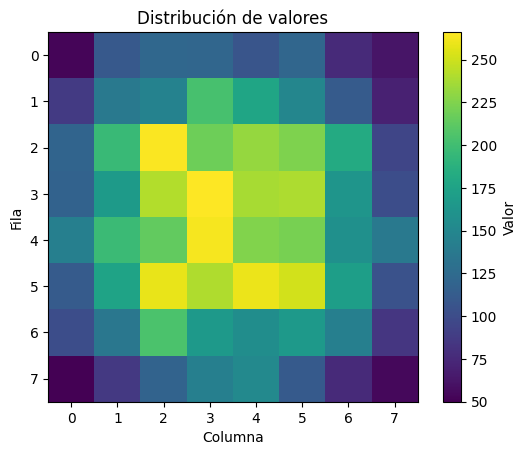

In [7]:
matrix = moves(10000)
plt.imshow(matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Valor')
plt.title("Distribución de valores")
plt.xlabel("Columna")
plt.ylabel("Fila")
plt.show()